# 1) Importing the datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
data_imdb = pd.read_csv('/content/imdb_labelled.txt', sep='\t',header=None)

In [4]:
data_imdb.head()
# review and sentiment
# 0-Negative, 1-Positive for positive review

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
# Assign column names
columan_name = ['Review', 'Sentiment']
data_imdb.columns = columan_name

In [6]:
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
data_imdb.shape
# 1000 rows (reviews), 2 columns (Sentiments)

(748, 2)

In [8]:
data = data_imdb

In [9]:
data.shape

(748, 2)

In [10]:
data.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
# check distribution of sentiments

In [12]:
data['Sentiment'].value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

In [13]:
# check for null values
data.isnull().sum()

# no null values in the data

Review       0
Sentiment    0
dtype: int64

In [14]:
x = data['Review']
y = data['Sentiment']

# 2) Data Cleaning

In [15]:
# here we will remove stopwords, punctuations
# as well as we will apply lemmatization

## Create a function to clean the data

In [16]:
import string

In [17]:
punct = string.punctuation

In [18]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
from spacy.lang.en.stop_words import STOP_WORDS

In [20]:
stopwords = list(STOP_WORDS) # list of stopwords

In [21]:
# creating a function for data cleaning

In [22]:
def text_data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = [] # list of tokens
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [23]:
# if root form of that word is not pronoun then it is going to convert that into lower form
# and if that word is a proper noun, then we are directly taking lower form, because there is no lemma for proper noun

In [24]:
text_data_cleaning("Hello all, It's a beautiful day outside there!")
# stopwords and punctuations removed

['hello', 'beautiful', 'day', 'outside']

## Vectorization Feature Engineering (TF-IDF)

In [25]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [26]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)
# tokenizer=text_data_cleaning, tokenization will be done according to this function

In [27]:
classifier = LinearSVC()

# 3) Train the model

## Splitting the dataset into the Train and Test set

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
x_train.shape, x_test.shape
# 2198 samples in training dataset and 550 in test dataset

((598,), (150,))

In [30]:
x_train.head()

97                            I hate movies like that.  
516    The attractive set used throughout most of the...
156    The writers were "smack on" and I think the be...
395    But "Tiny Toons" kept the 90's vibe and delive...
732             She is as lovely as usual, this cutie!  
Name: Review, dtype: object

## Fit the x_train and y_train

In [31]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
# it will first do vectorization and then it will do classification

In [32]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f3505c05550>)),
                ('clf', LinearSVC())])

In [33]:
# in this we don't need to prepare the dataset for testing(x_test)

# 4) Predict the Test set results

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
y_pred = clf.predict(x_test)

In [36]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[58, 26],
       [ 6, 60]])

In [37]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        84
           1       0.70      0.91      0.79        66

    accuracy                           0.79       150
   macro avg       0.80      0.80      0.79       150
weighted avg       0.81      0.79      0.79       150



In [38]:
accuracy_score(y_test, y_pred)

0.7866666666666666

In [39]:
clf.predict(["Wow, I am learning Natural Language Processing in fun fashion!"])

array([1])

In [40]:
clf.predict(["It's hard to learn new things!"])

array([0])

In [41]:
clf.predict(["Great movie. Easy to Watch!!"])

array([1])

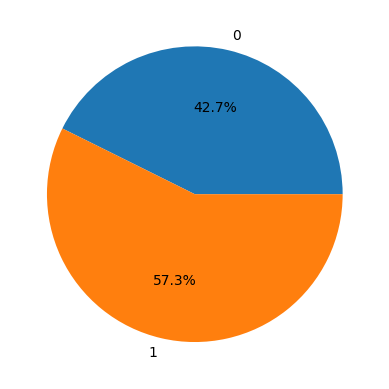

In [42]:
# Calculate the frequency of each value in the array
unique, counts = np.unique(y_pred, return_counts=True)

# Create the plot
plt.pie(counts, labels=unique, autopct='%1.1f%%')

# Show the plot
plt.show()